In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model

In [34]:
model = VGG16()
model.summary()
# In 2014 this architecture won the ILSVRC challenge

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

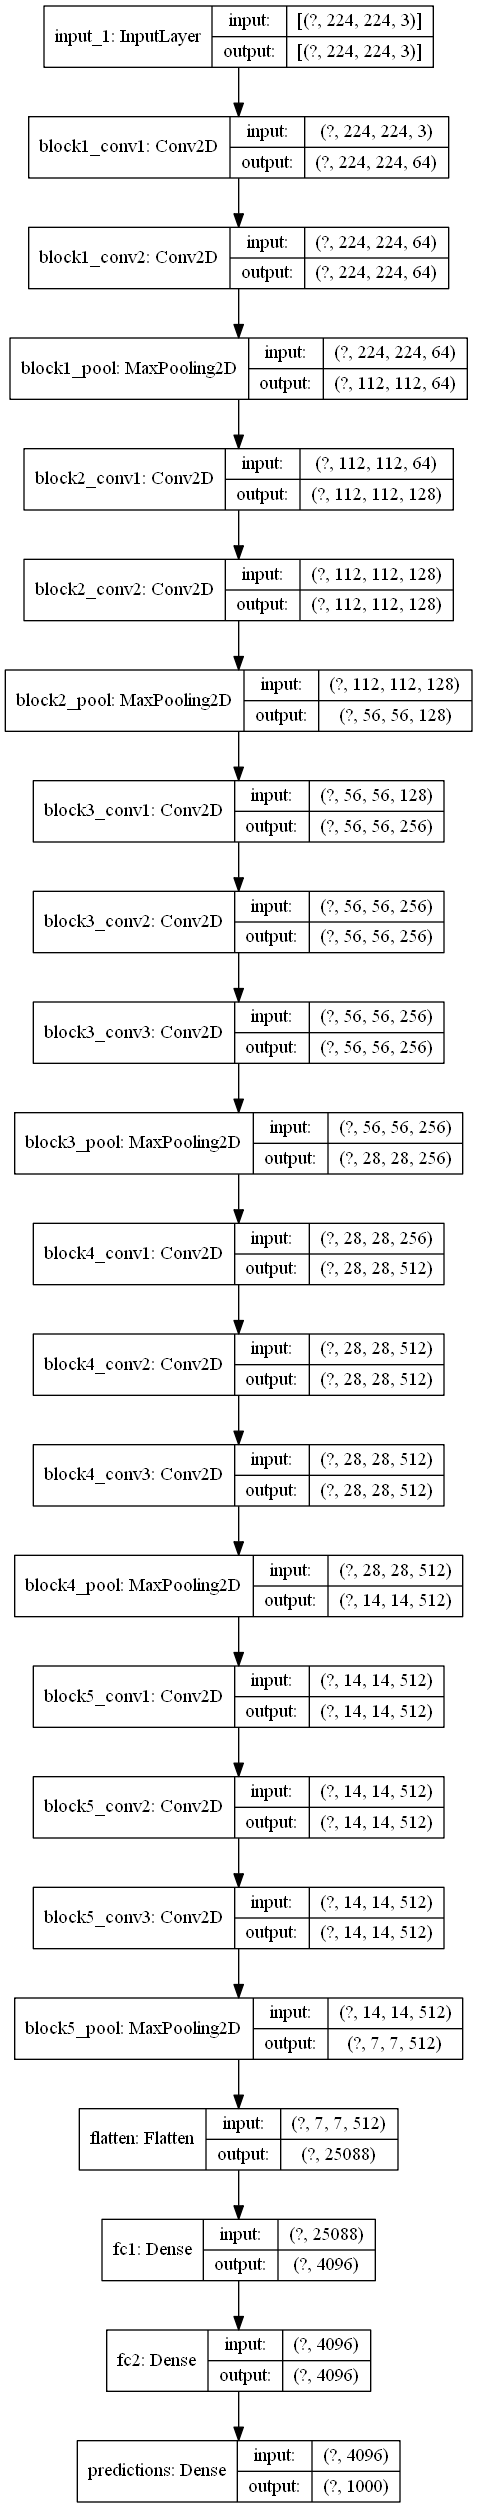

In [4]:
plot_model(model, show_shapes=True)

In [ ]:
# Transfer learning - freeze weights of other model to the layer 
# that you want - you are not retraining those layers - means 
# backpropagation is not updadting weights of those layers

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_img = image.load_img(r"E:\PythonCore\Deep Learning\2 - Convolutional_Neural_Networks\dataset\single_prediction\cat_or_dog_2.jpg",
                         target_size = (224,224))
test=image.img_to_array(test_img)
#test = test/255.
test = np.expand_dims(test, axis=0)
#model.predict(test)

In [12]:
from tensorflow.keras.applications.vgg16 import decode_predictions

In [14]:
decode_predictions(model.predict(test), top=3)

[[('n02124075', 'Egyptian_cat', 0.958311),
  ('n02123045', 'tabby', 0.03329964),
  ('n02123159', 'tiger_cat', 0.0051740007),
  ('n02127052', 'lynx', 0.0019827287),
  ('n03124043', 'cowboy_boot', 0.00023074058),
  ('n03887697', 'paper_towel', 0.00010054694),
  ('n04074963', 'remote_control', 7.459114e-05),
  ('n04254777', 'sock', 6.271901e-05),
  ('n02948072', 'candle', 6.0704828e-05),
  ('n04522168', 'vase', 5.8971622e-05),
  ('n02808304', 'bath_towel', 5.3734686e-05),
  ('n02123597', 'Siamese_cat', 5.37165e-05),
  ('n04040759', 'radiator', 5.323726e-05),
  ('n02326432', 'hare', 5.3040076e-05),
  ('n03775071', 'mitten', 2.9596993e-05),
  ('n02325366', 'wood_rabbit', 2.5495645e-05),
  ('n02109961', 'Eskimo_dog', 2.539489e-05),
  ('n02883205', 'bow_tie', 2.0774794e-05),
  ('n02971356', 'carton', 1.8962372e-05),
  ('n04589890', 'window_screen', 1.453165e-05),
  ('n04344873', 'studio_couch', 1.4212133e-05),
  ('n02105412', 'kelpie', 1.3781862e-05),
  ('n02120505', 'grey_fox', 1.2506117e-05

In [16]:
len(model.layers)

23

In [17]:
layer_outputs = [layer.output for layer in model.layers[:5]]

In [18]:
layer_outputs

[<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>,
 <tf.Tensor 'block1_conv1/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_conv2/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_pool/MaxPool:0' shape=(None, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1/Relu:0' shape=(None, 112, 112, 128) dtype=float32>]

In [19]:
from tensorflow.keras.models import Model

In [20]:
activation_model = Model(inputs = model.input,
                        outputs = layer_outputs)

In [21]:
activations=activation_model.predict(test)

In [24]:
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt

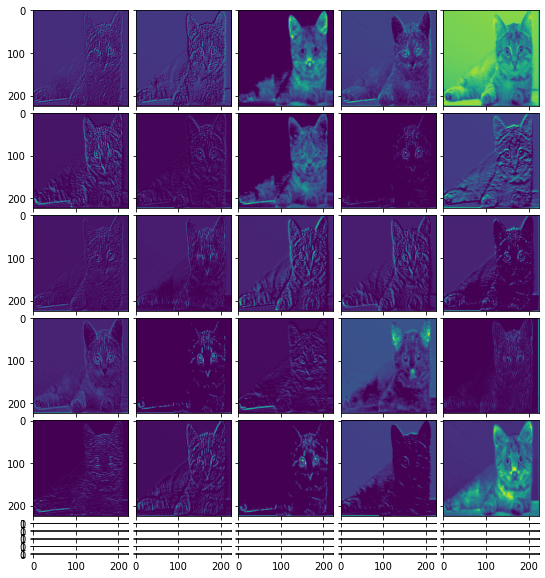

In [30]:
layerno = 2
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(10, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, i in zip(grid, range(25)):
    # Iterating over the grid returns the Axes.
    im1 = activations[layerno][0, :, :, i]
    ax.imshow(im1)

plt.show()